In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
data = {
    'Model': ['Model A', 'Model B', 'Model C', 'Model D'],
    'Rouge Score': [0.72, 0.78, 0.65, 0.82],
    'BLEU Score': [0.67, 0.74, 0.61, 0.77],
    'Inference Time (ms)': [120, 140, 90, 110],
    'Memory Usage (MB)': [512, 490, 620, 530]
}

In [3]:
df = pd.DataFrame(data)
print("Input Data:")
print(df)


Input Data:
     Model  Rouge Score  BLEU Score  Inference Time (ms)  Memory Usage (MB)
0  Model A         0.72        0.67                  120                512
1  Model B         0.78        0.74                  140                490
2  Model C         0.65        0.61                   90                620
3  Model D         0.82        0.77                  110                530


In [4]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df.iloc[:, 1:])
norm_df = pd.DataFrame(normalized_data, columns=df.columns[1:])
norm_df['Model'] = df['Model']

In [6]:
# Define weights for each criterion (adjust as per your problem)
weights = [0.4, 0.3, 0.2, 0.1]  # Sum must be 1

# Define whether criteria are benefit (+1) or cost (-1)
criteria = [1, 1, -1, -1]  # Rouge and BLEU are benefits; Time and Memory are costs

# Calculate the weighted normalized decision matrix
weighted_matrix = norm_df.iloc[:, :-1].values * weights * criteria

# Calculate the ideal best and worst
ideal_best = np.max(weighted_matrix, axis=0)
ideal_worst = np.min(weighted_matrix, axis=0)

# Calculate the distances to the ideal best and worst
dist_to_best = np.linalg.norm(weighted_matrix - ideal_best, axis=1)
dist_to_worst = np.linalg.norm(weighted_matrix - ideal_worst, axis=1)

In [7]:
# Calculate the TOPSIS score
scores = dist_to_worst / (dist_to_best + dist_to_worst)
df['TOPSIS Score'] = scores

# Rank the models based on the scores
df['Rank'] = df['TOPSIS Score'].rank(ascending=False)

print("\nTOPSIS Results:")
print(df)


TOPSIS Results:
     Model  Rouge Score  BLEU Score  Inference Time (ms)  Memory Usage (MB)  \
0  Model A         0.72        0.67                  120                512   
1  Model B         0.78        0.74                  140                490   
2  Model C         0.65        0.61                   90                620   
3  Model D         0.82        0.77                  110                530   

   TOPSIS Score  Rank  
0      0.415323   3.0  
1      0.638988   2.0  
2      0.281729   4.0  
3      0.858220   1.0  


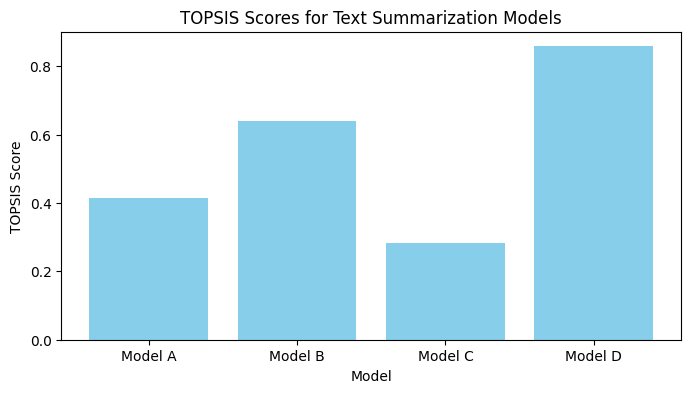

In [8]:
# Plotting the results
plt.figure(figsize=(8, 4))
plt.bar(df['Model'], df['TOPSIS Score'], color='skyblue')
plt.title('TOPSIS Scores for Text Summarization Models')
plt.xlabel('Model')
plt.ylabel('TOPSIS Score')
plt.show()


In [9]:
# Save results to a CSV file
df.to_csv('topsis_results.csv', index=False)
print("\nResults saved to topsis_results.csv")


Results saved to topsis_results.csv


In [17]:
from google.colab import files
files.download('topsis_results.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

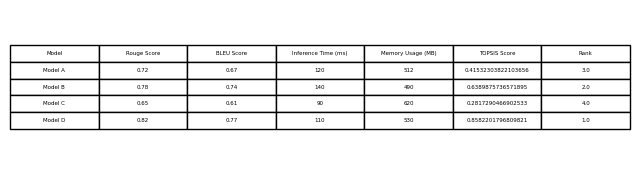

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 2))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
plt.savefig('topsis_results_table.png', dpi=300, bbox_inches='tight')
plt.show()
